N_CT used for concentration in old charts, LF ice and egg codes were not coded. 

In [ ]:
import numpy as np 
import cmocean
import xarray as xr   
from pathlib import Path
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import matplotlib.cm as cm
import time
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings; warnings.simplefilter('ignore')

from functions import load_ice, trend, find_trends, plot_cartopy, decomp

# input data directory

path = Path('/extra-space1/data/tikoralukupload/cis-weekly/nc/')

# region of interest
region = 'HB'

# Projection for mapping
rot = ccrs.RotatedPole(pole_latitude=55,pole_longitude=150)

# Construct the full file name
fname = path / '{}.nc'.format(region)

### Load data into a `xarray.Dataset`:
# Note that the data is loaded lazily which means that no actual data are actually written
# into memory.
# ds = xr.open_dataset(fname, decode_times=False)
# ds2021 = xr.open_dataset(fname2021, decode_times=False)

ds = xr.open_dataset(fname)

juld = ds.juld

# subset `xarray.Dataset` by index
ds = ds.isel(x=slice(1700, None), y=slice(600, 1450))

# create shortcuts to the variables. 
lon = ds.longitude
lat = ds.latitude
land = ds.land
# E_FA = ds['E_FA']
E_CT = ds['E_CT']
E_SA = ds['E_SA']
E_FA = ds['E_FA']
N_CT = ds['N_CT'] # Concentration for LF ice in old charts used N_Ct not E_Ct

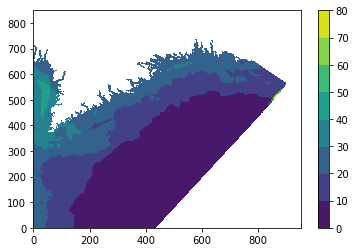

In [2]:
# N_CT
ds_yearly = N_CT.groupby("juld.year")

# Take averages
ds_yearly_means = ds_yearly.mean(dim=["juld"])
plt.contourf(ds_yearly_means[0,:,:])
plt.colorbar()

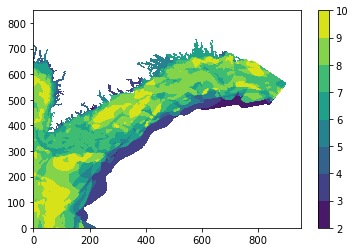

In [3]:
#E_CT
ds_yearly = E_CT.groupby("juld.year")

# Take averages
ds_yearly_means = ds_yearly.mean(dim=["juld"])
plt.contourf(ds_yearly_means[0,:,:])
plt.colorbar()

In [103]:
def plot_cartopy(ax, lon, lat):
    '''
    Set up the cartopy map with projection rotated so that Labrador coast is vertical. Input is the ax handle. 
    '''
    #Declare the land and ocean parameters
    LAND_highres = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m',
    edgecolor='black',
    facecolor=('silver'),
    linewidth=1)
    OCEAN_highres = cartopy.feature.NaturalEarthFeature('physical', 'ocean', '10m',
    facecolor='black')

    #Declare the lat and lon boundaries for the map and data
    domain = [99, 99, -99, -99]
    domain[0] = np.min(lat) # South
    domain[1] = np.min(lon) # West
    domain[2] = np.max(lat) # North
    domain[3] = np.max(lon) # East
    #     domain = list(np.array(domain) + np.array([+1, +6, 0, -4]))
    domain = [54.65, -61.30979545701268, 61.589404038199575, -56.47452933956656]
    # domain = [55, -61.30979545701268, 59, -61]

    aoi_map = [domain[0], domain[2], domain[1], domain[3]]
    # Rotation for vertical coast
    rot = ccrs.RotatedPole(pole_latitude=55,pole_longitude=150)

#     # Plot results
#     transform = rot.transform_points(rot,lon,lat)
#     x_n = transform[...,0]
#     y_n = transform[...,1]

    ax.add_feature(LAND_highres,zorder=2)
    ax.add_feature(OCEAN_highres,zorder=2)
    ax.set_extent([aoi_map[2], aoi_map[3], aoi_map[0], aoi_map[1]])
    ax.coastlines(resolution='10m',linewidth=0.35,zorder=3)
    

In [ ]:
# Compare N_CT to E_CT for different dates

dd = 1010
cmap=cmocean.cm.ice
# cmap='rainbow'
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,2,1, projection=rot)
plot_cartopy(ax,lon,lat)

plt.contourf(lon,lat,N_CT[dd],transform=ccrs.PlateCarree(),vmin=0,vmax=100,cmap=cmap,zorder=4)
# xarray.values converts to ndarray
plt.title('N_CT ' + juld.dt.strftime("%b %d %Y").values[dd])
plt.colorbar()

ax = fig.add_subplot(1,2,2, projection=rot)
plot_cartopy(ax,lon,lat)
plt.contourf(lon,lat,E_CT[dd],transform=ccrs.PlateCarree(),vmin=0,vmax=10,cmap=cmap,zorder=4)
# xarray.values converts to ndarray
plt.title('E_CT ' + juld.dt.strftime("%b %d %Y").values[dd])
plt.colorbar()

In [110]:
ds

<xarray.Dataset>
Dimensions:    (juld: 1043, x: 954, y: 850)
Coordinates:
  * x          (x) float64 1.734e+06 1.736e+06 1.736e+06 ... 2.686e+06 2.688e+06
  * y          (y) float64 3.16e+06 3.158e+06 3.158e+06 ... 2.312e+06 2.31e+06
  * juld       (juld) datetime64[ns] 1997-01-01 1997-02-01 ... 2020-10-26
Data variables:
    crs        int32 ...
    land       (y, x) float64 ...
    longitude  (y, x) float32 -61.6 -61.59 -61.57 ... -57.15 -57.14 -57.13
    latitude   (y, x) float32 63.65 63.64 63.64 63.63 ... 52.16 52.15 52.15
    E_CA       (juld, y, x) float64 ...
    E_CB       (juld, y, x) float64 ...
    E_CC       (juld, y, x) float64 ...
    E_CD       (juld, y, x) float64 ...
    E_CT       (juld, y, x) float64 ...
    E_FA       (juld, y, x) float64 ...
    E_FB       (juld, y, x) float64 ...
    E_FC       (juld, y, x) float64 ...
    E_FD       (juld, y, x) float64 ...
    E_FE       (juld, y, x) float64 ...
    E_SA       (juld, y, x) float64 ...
    E_SB       (juld, y, x) float64 ...
    E_SC       (juld, y, x) float64 ...
    E_SD       (juld, y, x) float64 ...
    E_SE       (juld, y, x) float64 ...
    E_SO       (juld, y, x) float64 ...
    N_CB       (juld, y, x) float64 ...
    N_CFY      (juld, y, x) float64 ...
    N_CFY_M    (juld, y, x) float64 ...
    N_CFY_TK   (juld, y, x) float64 ...
    N_CFY_TN   (juld, y, x) float64 ...
    N_CG       (juld, y, x) float64 ...
    N_CGW      (juld, y, x) float64 ...
    N_CM       (juld, y, x) float64 ...
    N_CMY      (juld, y, x) float64 ...
    N_CN       (juld, y, x) float64 ...
    N_COI      (juld, y, x) float64 ...
    N_CSY      (juld, y, x) float64 ...
    N_CT       (juld, y, x) float64 97.0 97.0 97.0 97.0 97.0 ... nan nan nan nan
    N_CTK      (juld, y, x) float64 ...
    N_CTN      (juld, y, x) float64 ...
    N_CVTK     (juld, y, x) float64 ...
    N_CYI      (juld, y, x) float64 ...